In [2]:
import pickle
from scipy import sparse
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import spektral
import os
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras_tuner as kt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import openpyxl

In [8]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\figure task 3.xlsx")
batch = batch.sort_values(by =["feed flow (sccm)"])
print(batch)
print(batch["ret. O2%"])

   feed P (psig)  Feed Rot (mm)  feed flow (sccm)  Per. P (psig)  \
2           69.5            6.0       1703.134109              0   
1           69.0            7.0       1986.989794              0   
5           83.0            7.0       1986.989794              0   
4           83.0            7.2       2043.760931              0   
0           68.0            7.5       2128.917637              0   
3           82.0            7.5       2128.917637              0   

   Per. Rot (mm)  Per. flow (sccm)  Per. O2%  ret. P (psig)  ret. Rot  \
2           76.5       3283.407297      22.2           69.5       2.0   
1           77.0       3304.867475      23.8           69.0      10.0   
5           89.5       3841.371935      22.3           82.0       2.5   
4           91.0       3905.752471      23.6           82.0      10.0   
0           77.5       3326.327653      24.9           69.0      15.0   
3           92.5       3970.133006      25.2           82.0      18.5   

   ret. flo

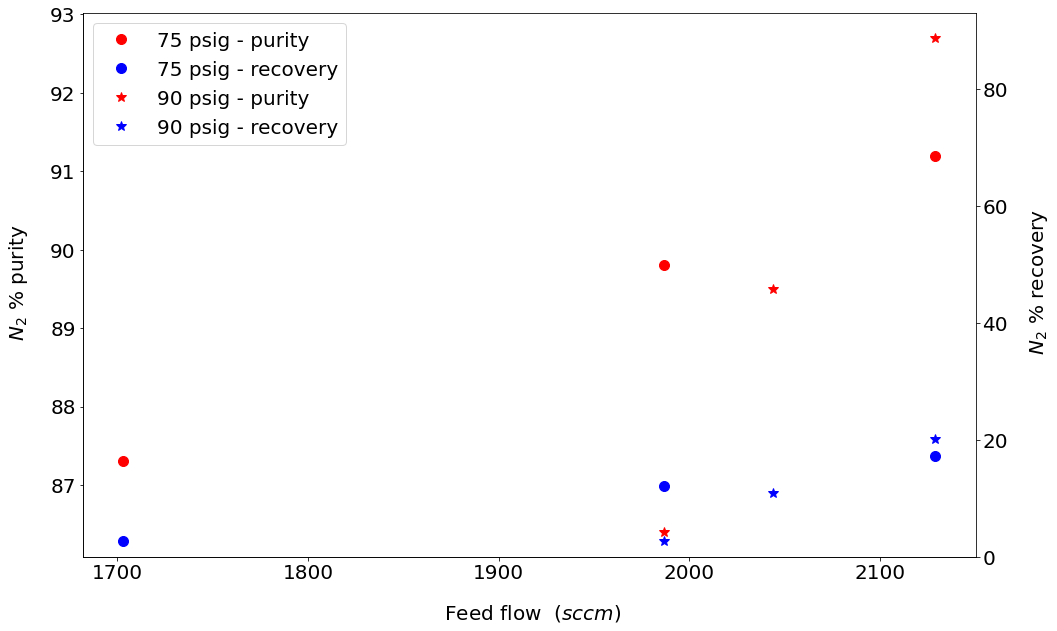

In [53]:
batch1 = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\figure task 3.xlsx")
#batch1_a = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\all pts.xlsx")
fig, ax1 = plt.subplots(figsize = (16, 10))
#total flux at permeate
#batch = batch_a[(batch_a["ret. O2%"] < 14) & (batch_a["ret. O2%"] >8)]
#batch1 = batch1_a[(batch1_a["ret. O2%"] < 14)& (batch_a["ret. O2%"] >8)]
n = 1
lw = 10
ax2 = ax1.twinx()
m1 = ax1.plot(batch1[batch1["s"] == "For 75 psig"]["feed flow (sccm)"],(100 - batch1[batch1["s"] == "For 75 psig"]["ret. O2%"]),'ro', markersize = lw, label = "75 psig - purity") #purity
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)
m2 =ax2.plot(batch1[batch1["s"] == "For 75 psig"]["feed flow (sccm)"],batch1[batch1["s"] == "For 75 psig"]["N2_recov"],'bo', markersize = lw, label = "75 psig - recovery") #recov

m3 =ax1.plot(batch1[batch1["s"] == "For 90 psig"]["feed flow (sccm)"],(100 - batch1[batch1["s"] == "For 90 psig"]["ret. O2%"]),'r*', markersize = lw, label = "90 psig - purity") #purity
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)
m4 = ax2.plot(batch1[batch1["s"] == "For 90 psig"]["feed flow (sccm)"],batch1[batch1["s"] == "For 90 psig"]["N2_recov"],'b*', markersize = lw, label = "90 psig - recovery") #recov

lns = m1+m2+m3+m4
labs = [l.get_label() for l in lns]

#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = ax1.legend(lns, labs, loc = 'best', fontsize = 20)
#legend = ax2.legend(ncol = 1, loc = 6, fontsize = 20)
ax1.set_ylabel(r" $N_2$ % purity", fontsize = 20,labelpad=20, color = 'k')
ax2.set_ylabel(r" $N_2%$ % recovery", fontsize = 20, labelpad = 20, color = 'k')
ax1.set_xlabel(r" Feed flow  $(sccm) $",fontsize = 20,labelpad=20)
ax2.set_ylim(0,93)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')